# <h1>DengAI - Predicting Dengue Cases</h1>
<br>
<p>By: Waldemar Ramos (walde363)<br>
       Alexandra Rosario (skyphu)<br>
       Manuel Sandoz (manuelsandoz)</p>
<br>
<h3>Introduction</h3>
<br>
<p>According to the <a href="http://www.who.int/health-topics/dengue-and-severe-dengue#tab=tab_1">World Health Organization</a> (WHO), dengue fever is a disease transmitted by mosquitoes that is common in warm, tropical climates. The disease has four different variants which can range from mild to near-fatal symptomatology. The WHO states that dengue fever occurs seasonally, peaking after rainy seasons. Other factors that can be favourable for the disease to propagate are air temperature, precipitation levels and humidity.</p>

<p>For this assignment, the task is to predict weekly dengue cases in San Juan, Puerto Rico and Iquitos, Peru. To begin, the pertinent libraries (pandas, matplotlib.pyplot, seaborn, and datetime. Then the files are read into variables and their data is examined using the <code>.info()</code> and <code>.head()</code> methods.</p>

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
from datetime import datetime as dt
from warnings import simplefilter

#Ignore warnings generated by Jupyter Notebook
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [79]:
dengue_features_test = pd.read_csv('dengue_features_test.csv')
dengue_features_train = pd.read_csv('dengue_features_train.csv')
dengue_labels_train = pd.read_csv('dengue_labels_train.csv')

display(dengue_features_test.info());
display(dengue_features_test.head());
display(dengue_features_test.describe());

display(dengue_features_train.info())
display(dengue_features_train.head())
display(dengue_features_train.describe())

display(dengue_labels_train.info())
display(dengue_labels_train.head())
display(dengue_labels_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2  

None

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,416.000000,416.000000,373.000000,405.000000,415.000000,415.000000,414.000000,414.000000,414.000000,414.000000,...,414.000000,414.000000,414.000000,414.000000,414.000000,404.000000,404.000000,413.000000,407.000000,411.000000
mean,2010.766827,26.439904,0.126050,0.126803,0.207702,0.201721,38.354324,298.818295,299.353071,295.419179,...,42.171135,82.499810,38.354324,16.927088,5.124569,27.369587,7.810991,32.534625,22.368550,34.278589
std,1.434835,14.978257,0.164353,0.141420,0.079102,0.092028,35.171126,1.469501,1.306233,1.523099,...,48.909514,7.378243,35.171126,1.557868,3.542870,1.232608,2.449718,1.920429,1.731437,34.655966
min,2008.000000,1.000000,-0.463400,-0.211800,0.006200,-0.014671,0.000000,294.554286,295.235714,290.818571,...,0.000000,64.920000,0.000000,12.537143,1.485714,24.157143,4.042857,27.200000,14.200000,0.000000
25%,2010.000000,13.750000,-0.001500,0.015975,0.148670,0.134079,8.175000,297.751429,298.323214,294.335714,...,9.430000,77.397143,8.175000,15.792857,2.446429,26.514286,5.928571,31.100000,21.200000,9.100000
50%,2011.000000,26.000000,0.110100,0.088700,0.204171,0.186471,31.455000,298.547143,299.328571,295.825000,...,25.850000,80.330000,31.455000,17.337143,2.914286,27.483333,6.642857,32.800000,22.200000,23.600000
75%,2012.000000,39.000000,0.263329,0.242400,0.254871,0.253243,57.772500,300.240357,300.521429,296.643571,...,56.475000,88.328929,57.772500,18.174643,8.171429,28.319048,9.812500,33.900000,23.300000,47.750000
max,2013.000000,53.000000,0.500400,0.649000,0.453043,0.529043,169.340000,301.935714,303.328571,297.794286,...,301.400000,97.982857,169.340000,19.598571,14.485714,30.271429,14.725000,38.400000,26.700000,212.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

None

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
count,1456.000000,1456.000000,1262.000000,1404.000000,1434.000000,1434.000000,1443.000000,1446.000000,1446.000000,1446.000000,...,1446.000000,1446.000000,1443.000000,1446.000000,1446.000000,1413.000000,1413.000000,1436.000000,1442.000000,1434.000000
mean,2001.031593,26.503434,0.142294,0.130553,0.203783,0.202305,45.760388,298.701852,299.225578,295.246356,...,40.151819,82.161959,45.760388,16.746427,4.903754,27.185783,8.059328,32.452437,22.102150,39.326360
std,5.408314,15.019437,0.140531,0.119999,0.073860,0.083903,43.715537,1.362420,1.261715,1.527810,...,43.434399,7.153897,43.715537,1.542494,3.546445,1.292347,2.128568,1.959318,1.574066,47.455314
min,1990.000000,1.000000,-0.406250,-0.456100,-0.015533,-0.063457,0.000000,294.635714,294.892857,289.642857,...,0.000000,57.787143,0.000000,11.715714,1.357143,21.400000,4.528571,26.700000,14.700000,0.000000
25%,1997.000000,13.750000,0.044950,0.049217,0.155087,0.144209,9.800000,297.658929,298.257143,294.118929,...,13.055000,77.177143,9.800000,15.557143,2.328571,26.300000,6.514286,31.100000,21.100000,8.700000
50%,2002.000000,26.500000,0.128817,0.121429,0.196050,0.189450,38.340000,298.646429,299.289286,295.640714,...,27.245000,80.301429,38.340000,17.087143,2.857143,27.414286,7.300000,32.800000,22.200000,23.850000
75%,2005.000000,39.250000,0.248483,0.216600,0.248846,0.246982,70.235000,299.833571,300.207143,296.460000,...,52.200000,86.357857,70.235000,17.978214,7.625000,28.157143,9.566667,33.900000,23.300000,53.900000
max,2010.000000,53.000000,0.508357,0.454429,0.538314,0.546017,390.600000,302.200000,302.928571,298.450000,...,570.500000,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,25.600000,543.300000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 4 columns):
city           1456 non-null object
year           1456 non-null int64
weekofyear     1456 non-null int64
total_cases    1456 non-null int64
dtypes: int64(3), object(1)
memory usage: 45.6+ KB


None

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


,year,weekofyear,total_cases
count,1456.000000,1456.000000,1456.000000
mean,2001.031593,26.503434,24.675137
std,5.408314,15.019437,43.596000
min,1990.000000,1.000000,0.000000
25%,1997.000000,13.750000,5.000000
50%,2002.000000,26.500000,12.000000
75%,2005.000000,39.250000,28.000000
max,2010.000000,53.000000,461.000000


In [80]:
data_df = dengue_features_train.append(dengue_features_test, sort=False)
data_df["total_cases"] = dengue_labels_train.total_cases

display(data_df.head())
display(data_df.info())
display(data_df.describe())

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872 entries, 0 to 415
Data columns (total 25 columns):
city                                     1872 non-null object
year                                     1872 non-null int64
weekofyear                               1872 non-null int64
week_start_date                          1872 non-null object
ndvi_ne                                  1635 non-null float64
ndvi_nw                                  1809 non-null float64
ndvi_se                                  1849 non-null float64
ndvi_sw                                  1849 non-null float64
precipitation_amt_mm                     1857 non-null float64
reanalysis_air_temp_k                    1860 non-null float64
reanalysis_avg_temp_k                    1860 non-null float64
reanalysis_dew_point_temp_k              1860 non-null float64
reanalysis_max_air_temp_k                1860 non-null float64
reanalysis_min_air_temp_k                1860 non-null float64
reanalysis_precip_

None

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1872.000000,1872.000000,1635.000000,1809.000000,1849.000000,1849.000000,1857.000000,1860.000000,1860.000000,1860.000000,...,1860.000000,1857.000000,1860.000000,1860.000000,1817.000000,1817.000000,1849.000000,1849.000000,1845.000000,1872.000000
mean,2003.194979,26.489316,0.138588,0.129713,0.204663,0.202174,44.109278,298.727770,299.253955,295.284823,...,82.237158,44.109278,16.786638,4.952903,27.226651,8.004112,32.470795,22.160790,38.201897,28.896902
std,6.292268,15.006319,0.146413,0.125082,0.075064,0.085768,42.065868,1.387410,1.272510,1.528046,...,7.203803,42.065868,1.547336,3.545887,1.281254,2.205734,1.950483,1.613325,44.961360,49.480557
min,1990.000000,1.000000,-0.463400,-0.456100,-0.015533,-0.063457,0.000000,294.554286,294.892857,289.642857,...,57.787143,0.000000,11.715714,1.357143,21.400000,4.042857,26.700000,14.200000,0.000000,0.000000
25%,1999.000000,13.750000,0.035300,0.041225,0.153457,0.141014,9.430000,297.678929,298.276786,294.164643,...,77.214643,9.430000,15.590714,2.357143,26.328571,6.357143,31.100000,21.100000,8.800000,6.000000
50%,2004.000000,26.000000,0.127317,0.115200,0.197029,0.188229,36.640000,298.617143,299.300000,295.667143,...,80.307143,36.640000,17.137143,2.871429,27.433333,7.200000,32.800000,22.200000,23.800000,16.000000
75%,2008.000000,39.000000,0.252225,0.223360,0.250857,0.248086,67.500000,299.891429,300.271429,296.502857,...,86.799286,67.500000,18.028929,7.757143,28.200000,9.625000,33.900000,23.300000,51.500000,31.000000
max,2013.000000,53.000000,0.508357,0.649000,0.538314,0.546017,390.600000,302.200000,303.328571,298.450000,...,98.610000,390.600000,20.461429,16.028571,30.800000,15.800000,42.200000,26.700000,543.300000,461.000000


<h1>Data Cleaning</h1>
<p>Upon initial exploration of the data, we noticed a lot of missing data. None of the already existing data seems like it would
    be out of normal ranges, so the data cleaning just involves filling missing values. For this, we filled the missing data using
    a function that takes the weekly mean of the parametre and fills the missing data with this value. After this, only week 53
    remained with missing values. For this, we chose to use a forward-fill method to take values from preceding week 52 and
    fill.
</p>

In [81]:
def fillperweek(df, col):
    """fill the missing values per week
        using the mean value of that week"""
    x = df.groupby("weekofyear").mean()
    y = x[col]
    for c, p in enumerate(df[col]):
        if(str(p) == 'nan'):
            for l, h in enumerate(y):
                if(df.weekofyear.iloc[c] == l):
                    df[col].iloc[c] = h

In [82]:
for data in data_df.columns[4:]:
    fillperweek(data_df, data)
data_df.fillna(method="ffill", inplace =True)

sj_data = data_df[data_df.city == 'sj']
iq_data = data_df[data_df.city == 'iq']
    
    
sj_data.fillna(method='ffill', inplace=True)
iq_data.fillna(method='ffill', inplace=True)

display(sj_data.head())
display(sj_data.info())
display(sj_data.describe())

display(iq_data.head())
display(iq_data.info())
display(iq_data.describe())

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 259
Data columns (total 25 columns):
city                                     1196 non-null object
year                                     1196 non-null int64
weekofyear                               1196 non-null int64
week_start_date                          1196 non-null object
ndvi_ne                                  1196 non-null float64
ndvi_nw                                  1196 non-null float64
ndvi_se                                  1196 non-null float64
ndvi_sw                                  1196 non-null float64
precipitation_amt_mm                     1196 non-null float64
reanalysis_air_temp_k                    1196 non-null float64
reanalysis_avg_temp_k                    1196 non-null float64
reanalysis_dew_point_temp_k              1196 non-null float64
reanalysis_max_air_temp_k                1196 non-null float64
reanalysis_min_air_temp_k                1196 non-null float64
reanalysis_precip_

None

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,...,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000
mean,2001.326923,26.503344,0.066818,0.063399,0.177887,0.163440,33.547759,299.221402,299.330137,295.151947,...,78.502445,33.547759,16.592362,2.536633,27.058121,6.627557,31.616184,22.705100,28.427685,38.734950
std,6.652597,15.020404,0.108975,0.091470,0.059185,0.056056,42.250037,1.251354,1.232325,1.589090,...,3.395910,42.250037,1.585526,0.506131,1.417454,0.843750,1.711857,1.515436,31.024825,58.654531
min,1990.000000,1.000000,-0.463400,-0.456100,-0.015533,-0.063457,0.000000,295.938571,296.114286,289.642857,...,64.920000,0.000000,11.715714,1.357143,22.842857,4.042857,26.700000,17.800000,0.000000,0.000000
25%,1996.000000,13.750000,0.007150,0.010929,0.137973,0.125225,0.730000,298.202143,298.321429,293.886429,...,76.216429,0.730000,15.257143,2.171429,25.885714,6.042857,30.600000,21.700000,6.900000,11.000000
50%,2001.000000,26.500000,0.074775,0.064783,0.177017,0.163279,19.730000,299.333571,299.435714,295.485000,...,78.622857,19.730000,16.865714,2.471429,27.264286,6.600000,31.700000,22.800000,18.600000,21.000000
75%,2007.000000,39.250000,0.130355,0.113512,0.214425,0.201854,49.575000,300.286429,300.358929,296.475357,...,80.880000,49.575000,17.923929,2.814286,28.228571,7.157143,32.800000,23.900000,39.100000,40.000000
max,2013.000000,53.000000,0.500400,0.649000,0.393129,0.381420,390.600000,302.200000,302.164286,297.795714,...,87.575714,390.600000,19.440000,4.428571,30.271429,9.914286,35.600000,26.700000,305.900000,461.000000


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775000,32.5,20.7,3.0,0
937,iq,2000,27,2000-07-08,0.216833,0.276100,0.289457,0.241657,60.61,296.634286,...,93.581429,60.61,16.862857,10.314286,26.900000,11.566667,34.0,20.8,55.6,0
938,iq,2000,28,2000-07-15,0.176757,0.173129,0.204114,0.128014,55.52,296.415714,...,95.848571,55.52,17.120000,7.385714,26.800000,11.466667,33.0,20.7,38.1,0
939,iq,2000,29,2000-07-22,0.227729,0.145429,0.254200,0.200314,5.60,295.357143,...,87.234286,5.60,14.431429,9.114286,25.766667,10.533333,31.5,14.7,30.0,0
940,iq,2000,30,2000-07-29,0.328643,0.322129,0.254371,0.361043,62.76,296.432857,...,88.161429,62.76,15.444286,9.500000,26.600000,11.480000,33.3,19.1,4.0,0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 676 entries, 936 to 415
Data columns (total 25 columns):
city                                     676 non-null object
year                                     676 non-null int64
weekofyear                               676 non-null int64
week_start_date                          676 non-null object
ndvi_ne                                  676 non-null float64
ndvi_nw                                  676 non-null float64
ndvi_se                                  676 non-null float64
ndvi_sw                                  676 non-null float64
precipitation_amt_mm                     676 non-null float64
reanalysis_air_temp_k                    676 non-null float64
reanalysis_avg_temp_k                    676 non-null float64
reanalysis_dew_point_temp_k              676 non-null float64
reanalysis_max_air_temp_k                676 non-null float64
reanalysis_min_air_temp_k                676 non-null float64
reanalysis_precip_amt_kg_per_m2

None

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
count,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,...,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000,676.000000
mean,2006.500000,26.464497,0.264409,0.246071,0.252183,0.270370,62.819698,297.844352,299.108850,295.514336,...,88.862852,62.819698,17.124507,9.211580,27.526288,10.421594,33.965941,21.198883,55.517059,11.491124
std,3.777712,14.992450,0.079990,0.078364,0.076133,0.085940,34.562454,1.153066,1.323801,1.377567,...,7.380084,34.562454,1.409322,2.393981,0.882411,1.627985,1.327472,1.273241,57.971278,14.859089
min,2000.000000,1.000000,0.061729,0.035860,0.029880,0.064183,0.000000,294.554286,294.892857,290.088571,...,57.787143,0.000000,12.111429,3.714286,21.400000,5.200000,29.600000,14.200000,0.000000,0.000000
25%,2003.000000,13.750000,0.201879,0.186554,0.196600,0.206796,38.795000,297.095357,298.205357,294.622857,...,84.666071,38.795000,16.148571,7.385714,27.000000,9.230000,33.175000,20.600000,16.000000,2.000000
50%,2006.500000,26.000000,0.263536,0.241486,0.250250,0.265650,58.655000,297.817857,299.067857,295.875714,...,91.210714,58.655000,17.450000,9.000000,27.600000,10.475000,34.000000,21.400000,38.850000,6.000000
75%,2010.000000,39.000000,0.319854,0.299636,0.302550,0.327664,83.932500,298.565000,300.066071,296.544643,...,94.595357,83.932500,18.180000,10.967857,28.085000,11.600000,34.800000,22.000000,76.025000,15.250000
max,2013.000000,53.000000,0.508357,0.464800,0.538314,0.546017,210.830000,301.935714,303.328571,298.450000,...,98.610000,210.830000,20.461429,16.028571,30.800000,15.800000,42.200000,24.200000,543.300000,116.000000


<h1>Analysis of the data</h1>
<p> In this part of the project we explore the data in order to look for possible 
    correlations in the separate data. First we plotted horizontal barplots for the data frames 
    of each city. To do this we first calculated the correlation of the values in the data frame 
    compared to the total cases. Then we droped the 'total_cases', 'weekofyear' and 'year' columns
    of the data frame to avoid mistake since this are the non-numeric columns. Finally we sorted
    all the values in ascending order and then plotted the graph. We did this same procedure for 
    the San Juan and the Iquitos data.</p>
    
<p>From this analysis we first concluded that not all the data yields the same type of correlation
    for both cities. An example of this is the 'Station Precipitation'. In this column we can clearly see
    that it yields a negative correlation for total cases in Iquitos but a possitive correlation 
    in San Juan. This information confirmed that our desicion of dividing the data frame by city was 
    the correct one. From these plots we also concluded that we would choose only four columns from
    each data frame as our main features to test our models with. For San Juan the columns were 
    'reanalysis_specific_humidity_g_per_kg', 'reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k', 
    'station_avg_temp_c'. In the case of Iquitos the relevant columns were 'reanalysis_specific_humidity_g_per_kg', 
    'reanalysis_dew_point_temp_k', 'reanalysis_min_air_temp_k' and 'station_min_temp_c'.
</p>
<p> To continue or EDA we decided to do two heat maps. The point of doing these maps was to 
    corroborate our previous asumprions and to verify that two types of analysis resulted in 
    the same or similar results. To do this we called the seaborne heatmap function and 
    passed to it the correlation of the data frames, then we specified the square parameter as true 
    to ensure that our plot would result in a squared shape grid. Finally we specified the color
    scheme we wanted to the function using the cmap parameter. These steps were the same for both the 
    San Juan Data Frame and the Iquitos Data Frame. 
    
   From these plot we could first see that there seems to be a generally bigger correlation between
    all the Iquitos data compared to the correlation for San Juan data that seemed to have less
    correlation between the overall data. We could also see that there is no clear relation between the 
    total cases and the rest of the data in both plots. 
</p>

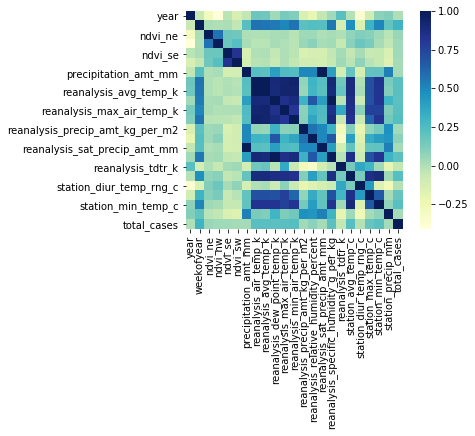

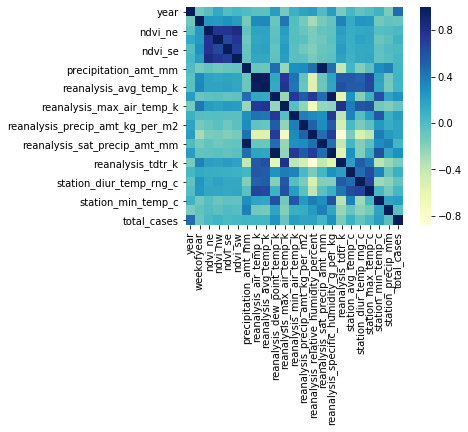

In [83]:
sns.heatmap(sj_data.corr(), square=True, cmap="YlGnBu")
plt.show()

sns.heatmap(iq_data.corr(), square=True, cmap="YlGnBu")
plt.show()

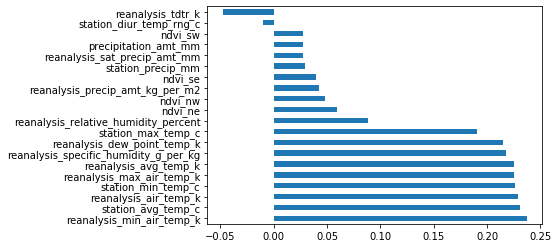

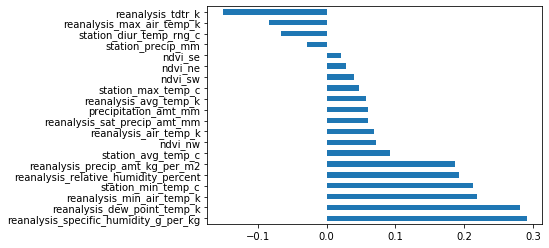

In [84]:
(sj_data.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .drop('weekofyear')
     .drop('year')
     .sort_values(ascending=False)
     .plot
     .barh())
plt.show()

(iq_data.corr()
     .total_cases
     .drop('total_cases') # don't compare with myself
     .drop('weekofyear')
     .drop('year')
     .sort_values(ascending=False)
     .plot
     .barh())
plt.show()

In [85]:
sj_columns = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'reanalysis_min_air_temp_k', 
                 'station_avg_temp_c']
                 
iq_columns = ['reanalysis_specific_humidity_g_per_kg', 
                 'reanalysis_dew_point_temp_k', 
                 'reanalysis_min_air_temp_k', 
                 'station_min_temp_c']

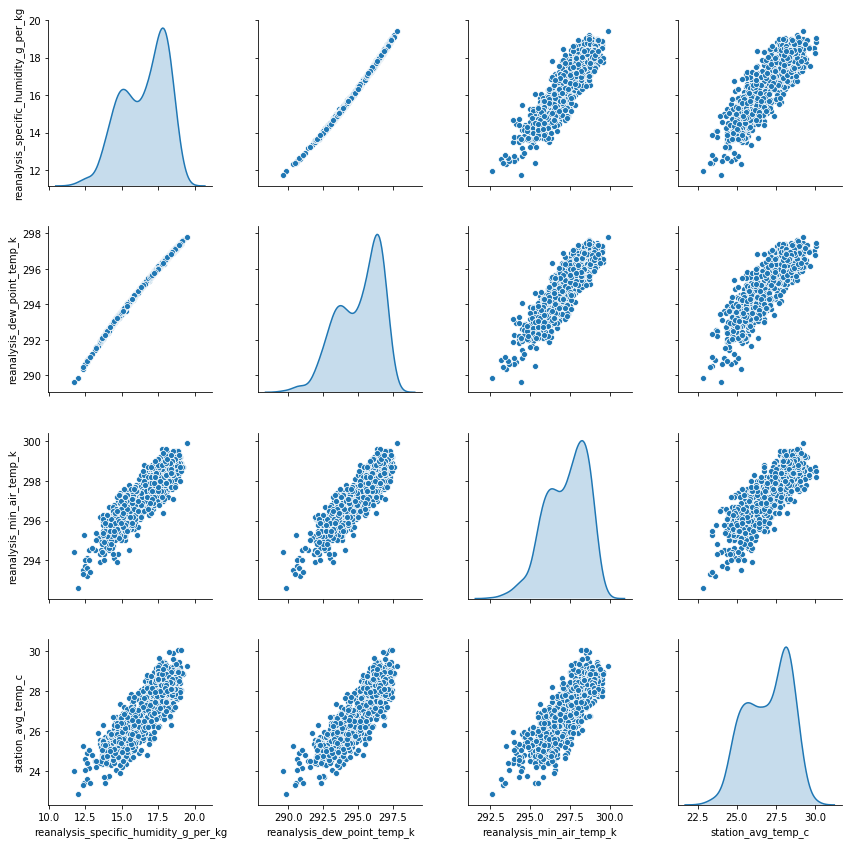

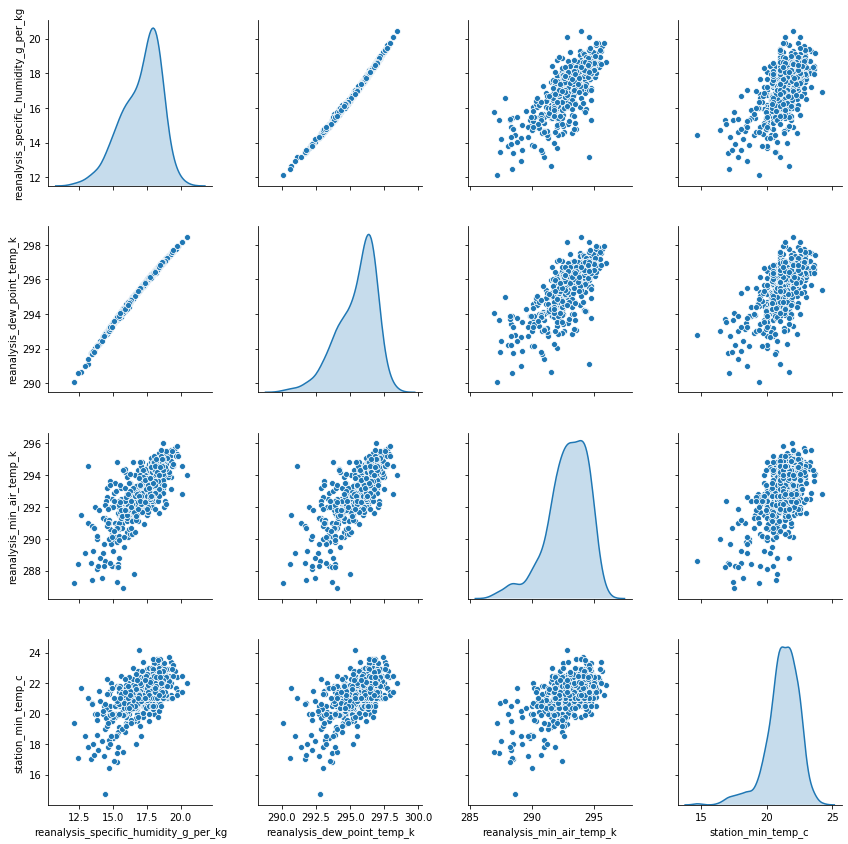

In [104]:
sj_pair = df_train_sj
iq_pair = df_train_iq

sj_pair.index = pd.to_datetime(sj_pair['week_start_date'])
iq_pair.index = pd.to_datetime(iq_pair['week_start_date'])

sj_pair = sj_pair[sj_columns]
iq_pair = iq_pair[iq_columns]

sns.pairplot(sj_pair, height = 3, kind='scatter', diag_kind='kde')
sns.pairplot(iq_pair, height = 3, kind='scatter', diag_kind='kde')
plt.show()

<h1>Choosing the predicting model</h1>
<p>To choose the predicting model that we would use, we decided to concatenate all the data and create a train test split with 
    the same size as the original, split into two: San Juan and Iquitos. We created a function that takes the 
x_train, y_train, x_test and the prediction model that we wanted to test as parametres.
The function fits the data to the model, makes a prediction, and graphs the comparison between
the real data and the predicted data.</p>

In [87]:
def pred_model(x_train, y_train, x_test, model):
    """this function makes a prediction with the input model and line plot it"""
    model = model
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    fig, ax = plt.subplots(figsize=(18,8))
    sns.lineplot(x_train.index, y_train.values, color = 'green', label='Real', ax=ax)
    sns.lineplot(x_test.index.values, pred, color = 'blue', ax=ax, label = 'Test predict')
    plt.show()

<h1>San Juan</h1>

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

In [89]:
x_train_sj, x_test_sj, y_train_sj, y_test_sj = train_test_split(sj_data[sj_columns], 
                                                    sj_data["total_cases"], 
                                                    test_size=0.1388, random_state = 42)

<h3>RandomForestRegressor()</h3>

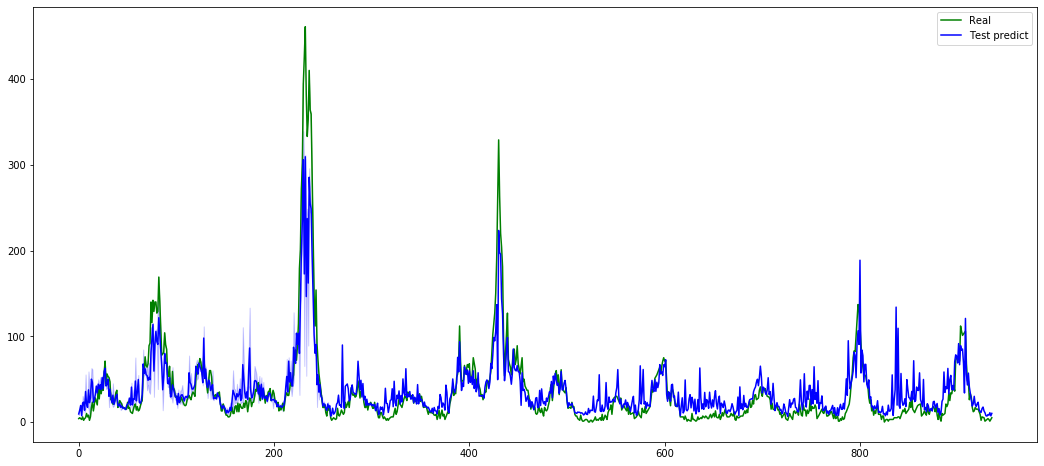

In [90]:
from sklearn.ensemble import RandomForestRegressor
pred_model(x_train_sj, y_train_sj, sj_data[sj_columns], RandomForestRegressor(n_estimators = 1000, random_state = 0))

<h3>LogisticRegression()</h3>

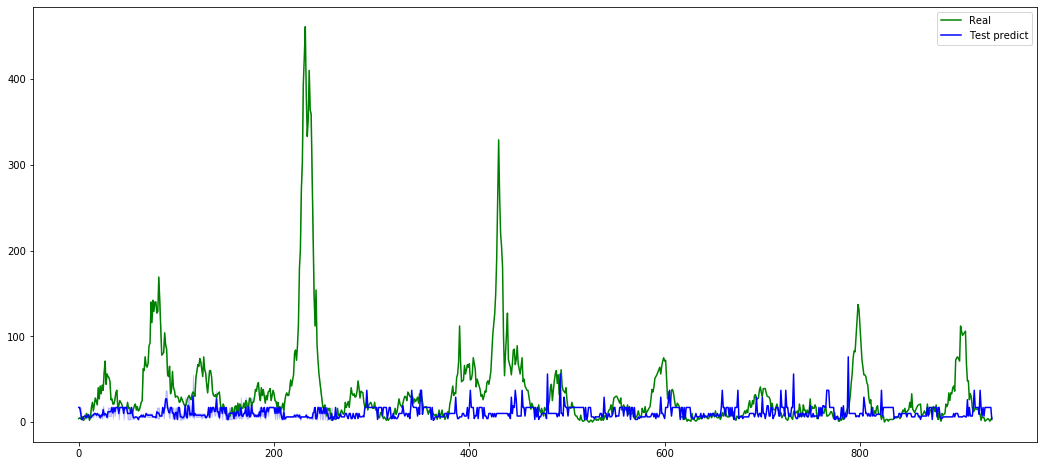

In [91]:
from sklearn.linear_model import LogisticRegression
pred_model(x_train_sj, y_train_sj, sj_data[sj_columns], LogisticRegression())

<h3>svm.SVC()</h3>

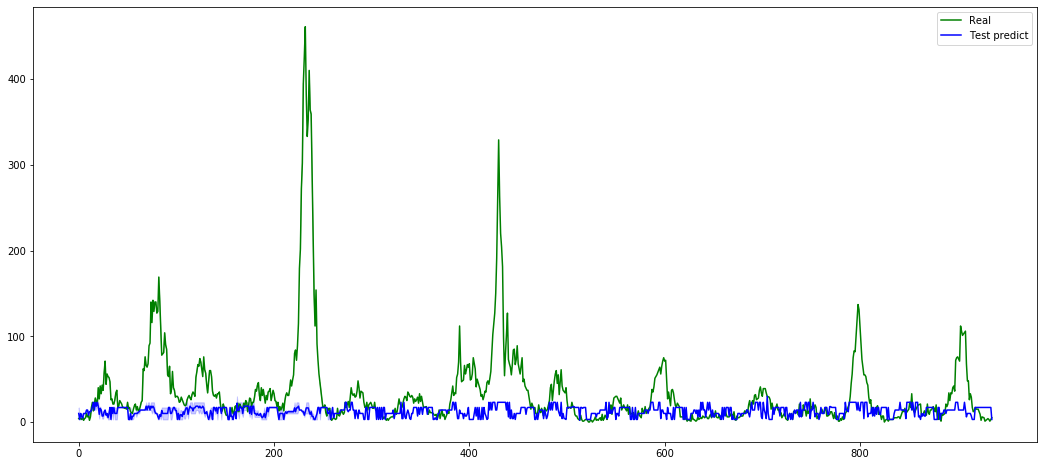

In [92]:
from sklearn import svm
pred_model(x_train_sj, y_train_sj, sj_data[sj_columns], svm.SVC())

<h3>AdaBoostRegressor()</h3>

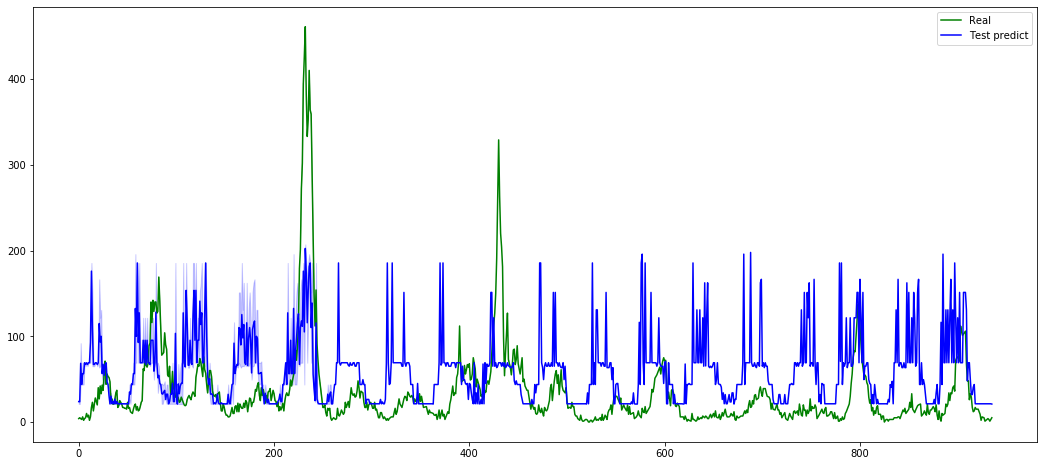

In [93]:
from sklearn.ensemble import AdaBoostRegressor
pred_model(x_train_sj, y_train_sj, sj_data[sj_columns],  AdaBoostRegressor(n_estimators = 1000))

<h3>GradientBoostingRegressor()</h3>

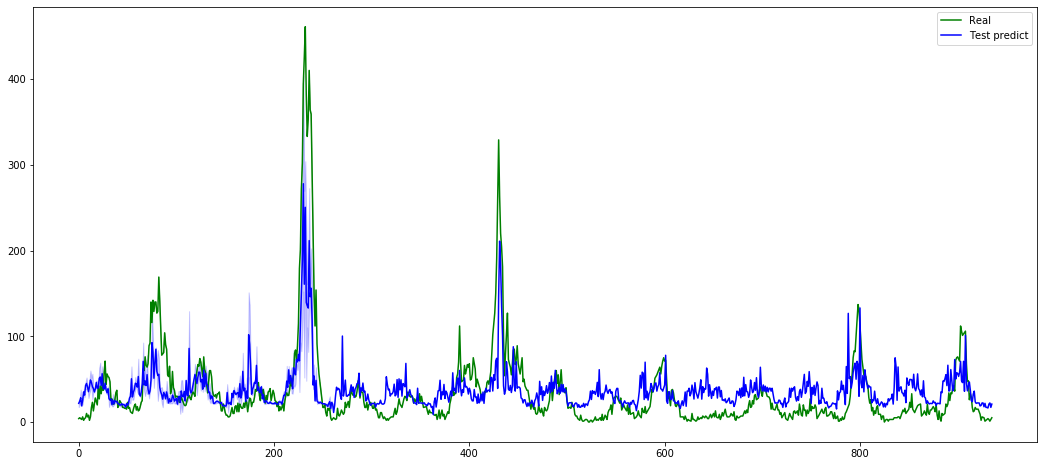

In [94]:
from sklearn.ensemble import GradientBoostingRegressor
pred_model(x_train_sj, y_train_sj, sj_data[sj_columns], GradientBoostingRegressor())

<h1>Iquitos</h1>

In [95]:
x_train_iq, x_test, y_train_iq, y_test_iq = train_test_split(iq_data[sj_columns], 
                                                    iq_data["total_cases"], 
                                                    test_size=0.1388, random_state = 42)

<h3>RandomForestRegressor()</h3>

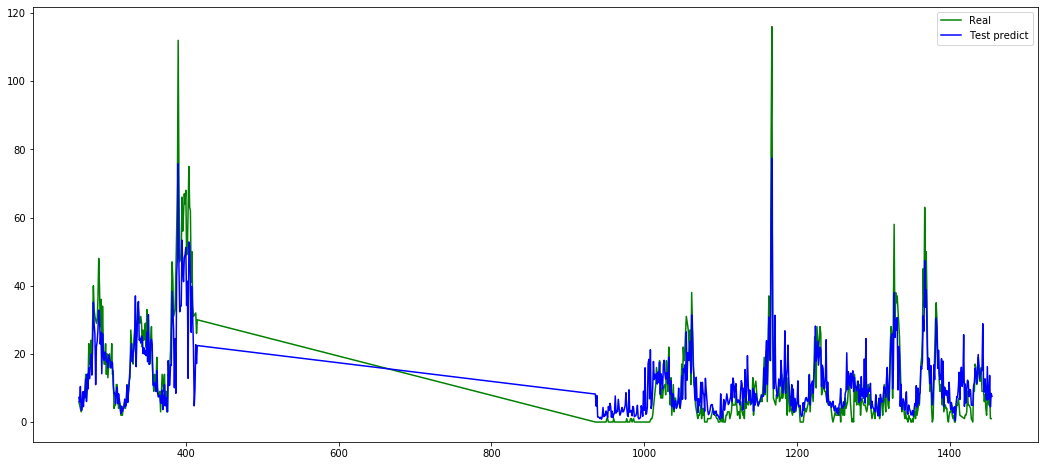

In [96]:
pred = pred_model(x_train_iq, y_train_iq, iq_data[sj_columns], RandomForestRegressor(n_estimators = 1000, random_state = 0))

<h3>LogisticRegression</h3>

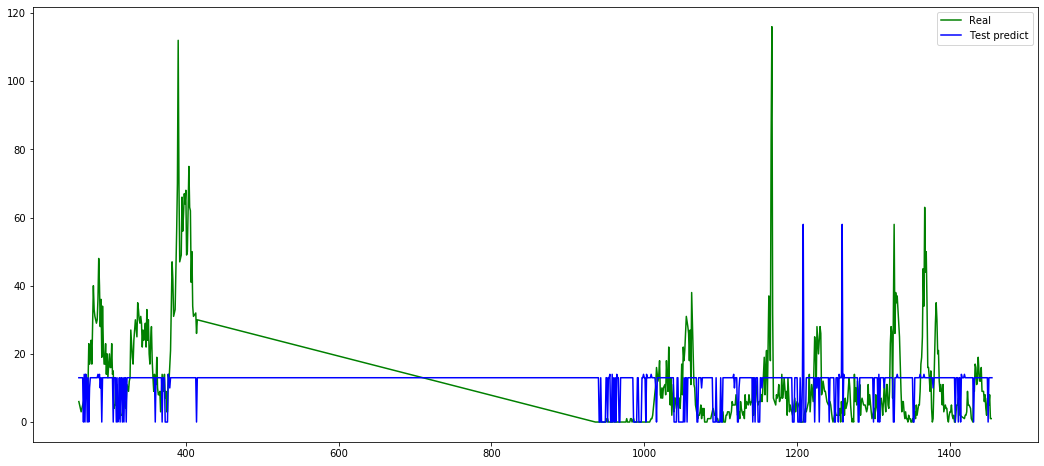

In [97]:
pred = pred_model(x_train_iq, y_train_iq, iq_data[iq_columns], LogisticRegression())

<h3>svm.SVC()</h3>

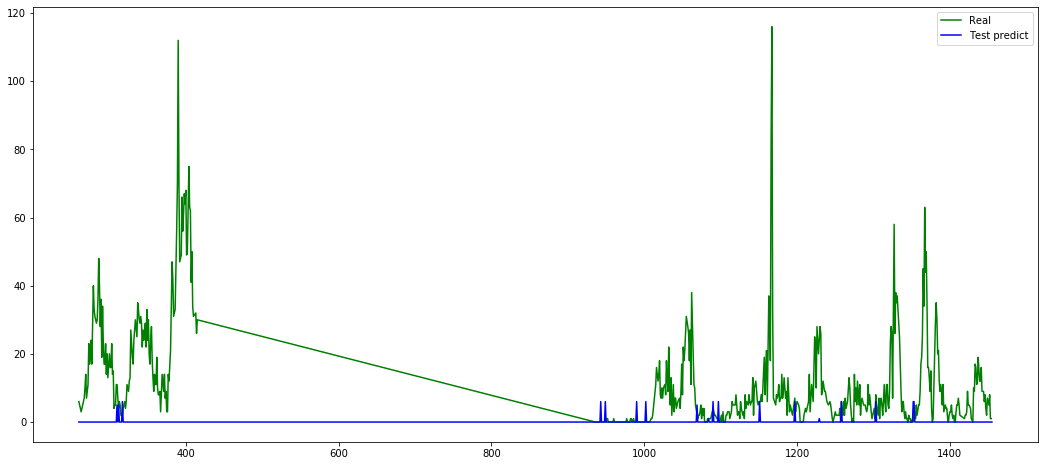

In [98]:
pred_model(x_train_iq, y_train_iq, iq_data[iq_columns], svm.SVC())

<h3>AdaBoostRegressor()</h3>

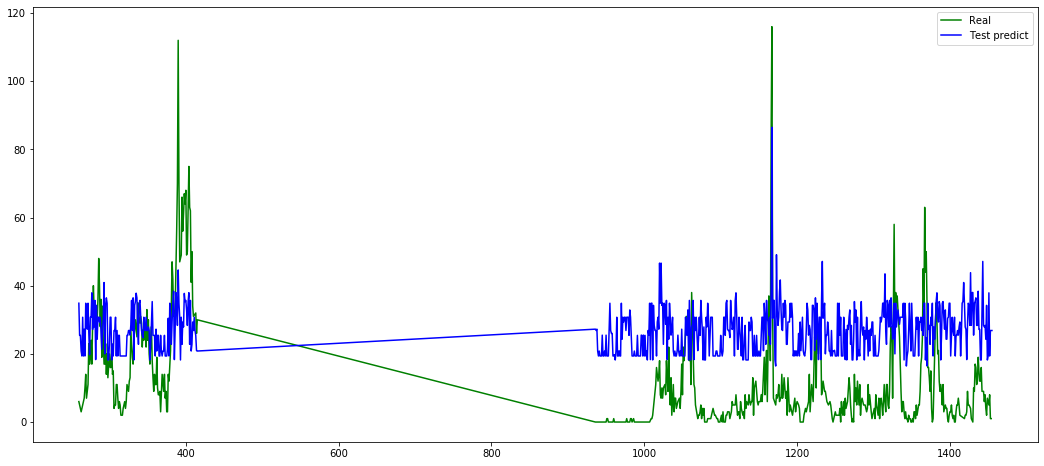

In [99]:
pred_model(x_train_iq, y_train_iq, iq_data[iq_columns],  AdaBoostRegressor(n_estimators = 1000))

<h3>GradientBoostingRegressor()</h3>

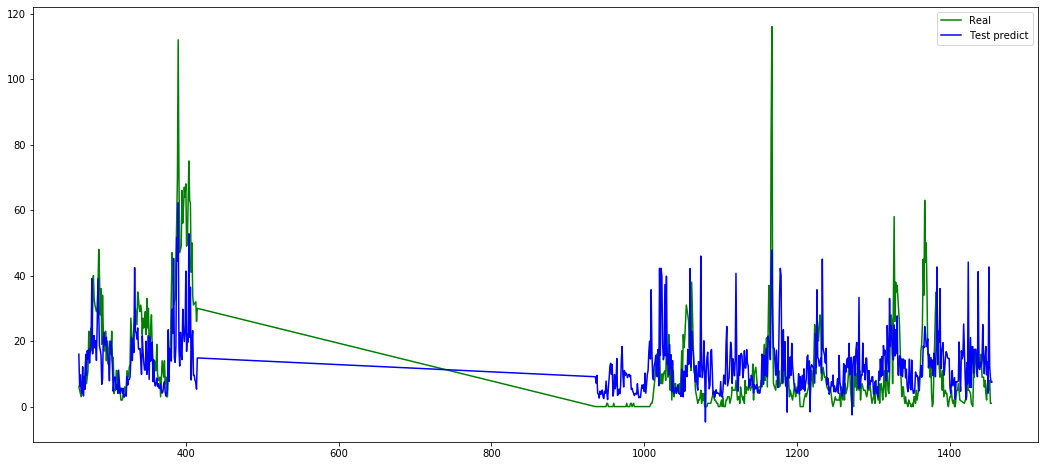

In [100]:
pred_model(x_train_iq, y_train_iq, iq_data[iq_columns], GradientBoostingRegressor())

<h1>Prediction</h1>
<p>After analyzing all the potential regression models that could accurately predict based on our non-linear data,
    we decided that the Random Forest Regressor was the best choice since it most accurately predicted the labels. Since the 
    Random Forest Regressor also compensates for overfitting data, it worked to our advantage. After training, fitting and
    predicting, we exported the data to a CSV and submitted it to DrivenData. Our submission scored a 27.
</p>

In [101]:
dengue_features_train['total_cases'] = dengue_labels_train.total_cases 
df_test_sj = dengue_features_test[dengue_features_test.city == 'sj']
df_train_sj = dengue_features_train[dengue_features_train.city == 'sj']
df_labels_sj = dengue_labels_train[dengue_labels_train.city == 'sj']

df_test_iq = dengue_features_test[dengue_features_test.city == 'iq']
df_train_iq = dengue_features_train[dengue_features_train.city == 'iq']
df_labels_iq = dengue_labels_train[dengue_labels_train.city == 'iq']

#Filling in data using fillperweek function
for data in dengue_features_test.columns[4:24]:
    fillperweek(df_test_sj, data)

for data in dengue_features_train.columns[4:24]:
    fillperweek(df_test_iq, data)
    
for data in dengue_features_test.columns[4:24]:
    fillperweek(df_train_sj, data)

for data in dengue_features_train.columns[4:24]:
    fillperweek(df_train_iq, data)

df_test_sj.fillna(method='ffill', inplace=True)
df_test_iq.fillna(method='ffill', inplace=True)

df_train_sj.fillna(method='ffill', inplace=True)
df_train_iq.fillna(method='ffill', inplace=True)

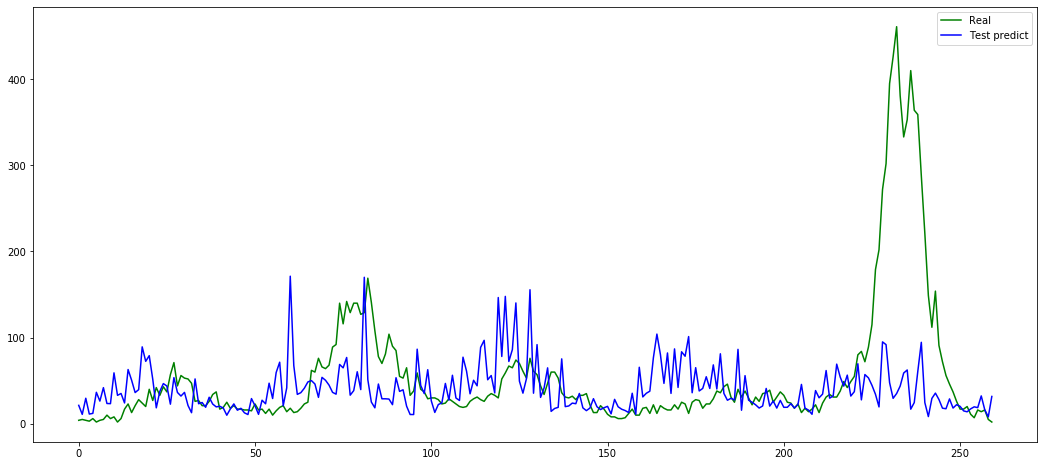

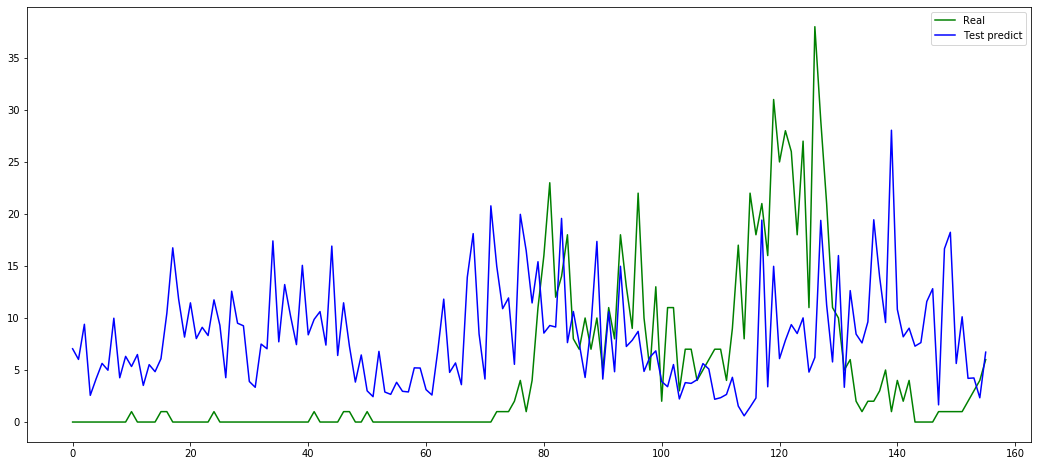

In [102]:
RFRSJ =  RandomForestRegressor(n_estimators = 1000, random_state = 0)
RFRSJ.fit(df_train_sj[sj_columns], df_train_sj['total_cases'])
pred_sj = RFRSJ.predict(df_test_sj[sj_columns])

RFRIQ =  RandomForestRegressor(n_estimators = 1000, random_state = 0)
RFRIQ.fit(df_train_iq[iq_columns], df_train_iq['total_cases'])
pred_iq = RFRIQ.predict(df_test_iq[iq_columns])

fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(range(0, 260),  df_train_sj['total_cases'][:260].values, color = 'green', label='Real', ax=ax)
sns.lineplot(range(0, 260), pred_sj, color = 'blue', ax=ax, label = 'Test predict')

fig, ax = plt.subplots(figsize=(18,8))
sns.lineplot(range(0, 156),  df_train_iq['total_cases'][:156].values, color = 'green', label='Real', ax=ax)
sns.lineplot(range(0, 156), pred_iq, color = 'blue', ax=ax, label = 'Test predict')

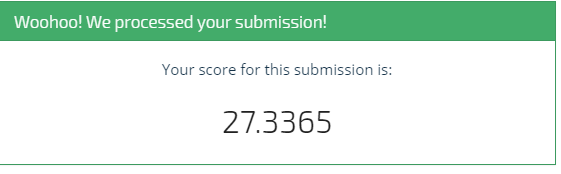

In [103]:
sj = [int(x) for x in pred_sj]
iq = [int(x) for x in pred_iq]

sf = pd.read_csv('submission_format.csv', index_col=[0, 1, 2])

sf.total_cases = np.concatenate([sj, iq])

sf.to_csv('sub.csv')
from PIL import Image
pic = "score.png"
Image.open(pic)